# **Project Name**    - 



##### **Project Type**    - Unsupervised (Online Retail Customer Segmentaion)
##### **Contribution**    - Individual (Mohd Arham Islam)


# **Project Summary -**

The goal of this project is to identify major customer segments for a UK-based non-store online retail company that specializes in selling unique all-occasion gifts. The provided dataset encompasses all the transactions that took place between 1st December 2010 and 9th December 2011. It is worth noting that a significant portion of the company's customer base consists of wholesalers.

By analyzing this transnational dataset, we aim to gain insights into the customer segments that drive the company's sales and understand their distinct characteristics. This information will enable the company to tailor its marketing and operational strategies to better serve these segments, ultimately leading to improved customer satisfaction and business growth.

To achieve our objective, we will employ various data analysis techniques and segmentation methodologies. Initially, we will explore the dataset to understand its structure, variables, and potential data quality issues. This step is crucial for ensuring the accuracy and reliability of our subsequent analysis.

Next, we will focus on feature engineering, which involves transforming raw data into meaningful features that capture relevant information about customer behavior and preferences.Once the feature engineering is complete, we will apply clustering algorithms to segment the customer base. 

By leveraging the knowledge gained from this analysis, the company can enhance its customer relationship management (CRM) efforts, optimize resource allocation, and make informed business decisions. Ultimately, this will lead to improved customer satisfaction, increased customer retention, and enhanced profitability.



# **GitHub Link -**

https://github.com/mohd-arham-islam/Customer-Segmentation

# **Problem Statement**


To develop a machine learning model to identify major customers on a transactional dataset.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [67]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [68]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [69]:
# Load Dataset
path = '/content/drive/MyDrive/Project/Customer.csv'
df = pd.read_csv(path,encoding= 'unicode_escape')

### Dataset First View

In [70]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [71]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [72]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [73]:
# Dataset Duplicate Value Count
num_duplicates = df.duplicated().sum()
num_duplicates

5268

#### Missing Values/Null Values

In [74]:
# Missing Values/Null Values Count
num_missing = df.isnull().sum()
num_missing

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

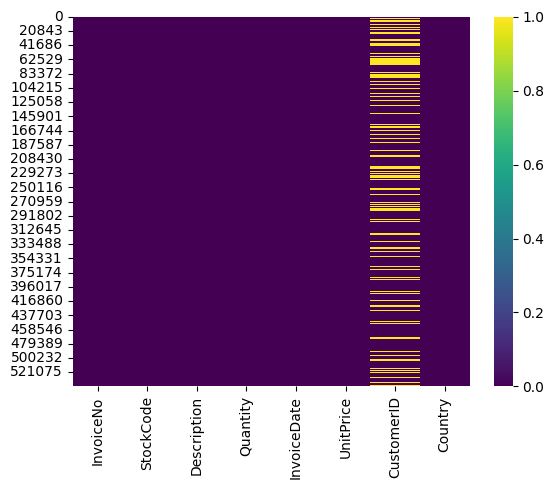

In [75]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cmap='viridis')

# Showing the plot
plt.show()

### What did you know about your dataset?

The dataset has around 5000 duplicate values. A few of the columns contain missing values. There may also be other issues with the dataset, such as outliers, inconsistencies, or data entry errors, that may need to be addressed during the data analysis process.

## ***2. Understanding Your Variables***

In [76]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [77]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description 

The dataset contains the following fields:

InvoiceNo: This field represents the invoice number associated with each transaction. It serves as a unique identifier for each purchase.

StockCode: The StockCode field corresponds to the stock name code of the product being purchased. It helps identify the specific item in the company's inventory.

Description: This field provides a description of the product being sold. It offers additional information about the nature, features, or characteristics of the item.

Quantity: The Quantity field indicates the quantity of the product bought in each transaction. It represents the number of units purchased.

InvoiceDate: This field denotes the date of the transaction. It captures the exact date and time when the purchase was made.

UnitPrice: The UnitPrice field represents the price per unit of the product being sold. It indicates the cost of a single unit of the item.

CustomerID: The CustomerID field contains a unique identifier for each customer. It helps track individual customer behavior and preferences across multiple transactions.

Country: The Country field specifies the location or country where the transaction took place. It provides information about the geographical distribution of the company's customer base.

### Check Unique Values for each variable.

In [78]:
# Check Unique Values for each variable.
for column in df.columns:
    print(column, ": ", df[column].nunique())

InvoiceNo :  25900
StockCode :  4070
Description :  4223
Quantity :  722
InvoiceDate :  23260
UnitPrice :  1630
CustomerID :  4372
Country :  38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [79]:
# Write your code to make your dataset analysis ready.
# Drop duplicate rows in the DataFrame
df.drop_duplicates(inplace=True)

In [80]:
num_duplicates = df.duplicated().sum()
num_duplicates

0

In [81]:
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom


In [82]:
df['Quantity'] = df['Quantity'].apply(lambda x: np.abs(x))
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [83]:
df[df['UnitPrice']<0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.06,NaN,United Kingdom


### What all manipulations have you done and insights you found?

I have dropped the duplicate rows in the dataset. There were some values in the 'Quantity' column that were negative, so I converted them into positive values and quantity cannot be less than 0 and there must have been some error while entering the data. The Unit Price column also has negative values. Upon further investigation, these negative values denote debt. The null values will be dealt with in the Feature Engineering section.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [84]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


#### Chart - 1

In [85]:
# Chart - 1: Top 5 Most Popular Items by Purchase Quantity
items = pd.pivot_table(df, values='Quantity', index='StockCode', aggfunc='sum')
items = items.sort_values('Quantity', ascending=False)
items = items.head()
items

,Quantity
StockCode,
23843,161990
23166,152527
22197,57369
84077,56151
85099B,49490


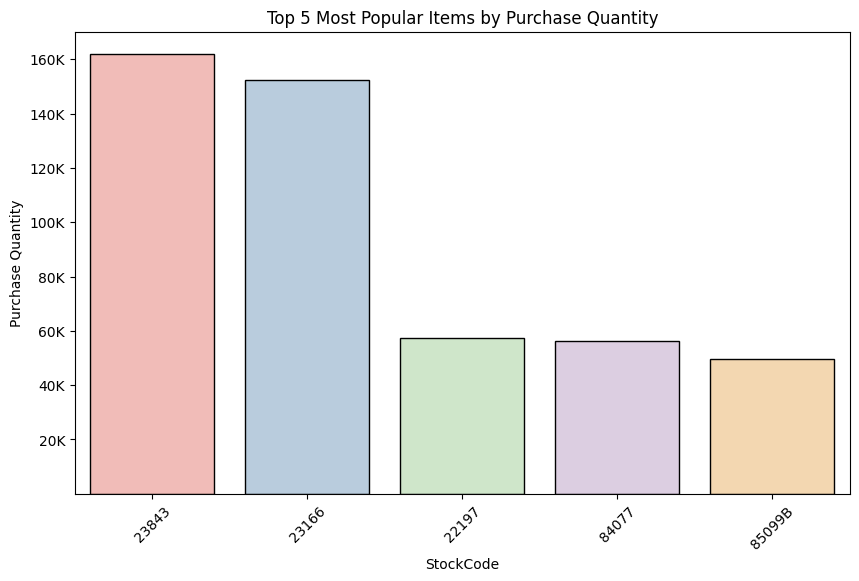

In [86]:
# Visualizing the table in the form of a bar chart

fig, ax = plt.subplots(figsize=(10, 6))

# hanging the colors of the bars
color = sns.color_palette('Pastel1')

# Defining the modified y-axis tick labels
y_ticks = ['20K', '40K', '60K', '80K', '100K', '120K', '140K', '160K']

# Plotting the bar chart

sns.barplot(data = items, x=list(items.index), y=items['Quantity'], palette=color, edgecolor='black')
plt.xlabel('StockCode')
plt.ylabel('Purchase Quantity')
plt.title('Top 5 Most Popular Items by Purchase Quantity')
plt.xticks(rotation=45)
plt.yticks(range(20000, 180000, 20000), y_ticks)  # Set modified y-axis tick labels
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the top 5 most popular items by purchase quantity because it effectively displays the relative quantities of different items in a visually appealing and easy-to-understand manner. Bar charts are suitable for comparing values across different categories, in this case, the StockCode values. 

##### 2. What is/are the insight(s) found from the chart?


From the chart, we can gather several insights about the popularity of different items based on their purchase quantity. The item with StockCode 23843 stands out as the most sought-after product, with a significant quantity of 161,990 units purchased. This indicates a high level of customer demand for this particular item. Following closely behind is the item with StockCode 23166, which boasts a substantial purchase quantity of 152,527 units. This suggests that it is also highly popular among customers.

In comparison, the item with StockCode 22197 shows a relatively lower quantity of 57,369 units, but it still demonstrates a noteworthy level of popularity. The items with StockCodes 84077 and 85099B exhibit similar quantities, with 56,151 and 49,490 units respectively. Although these quantities are lower than the top two items, they still indicate a considerable level of demand from customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can indeed help create a positive business impact. Understanding the most popular items based on their purchase quantity allows the business to focus on meeting customer demand and optimizing inventory management. By ensuring an adequate supply of the highly sought-after items, the company can increase customer satisfaction, enhance sales, and potentially generate higher revenue.

Regarding negative growth, it is important to note that the insights from the chart do not necessarily indicate negative growth directly. However, there are potential challenges that can arise if the business solely focuses on the top items without considering other factors.

#### Chart - 2

In [87]:
# Chart - 2: Line Chart of Revenue by InvoiceDate

# Changing data type of InvoiceDate to date-time.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extracting date component from 'InvoiceDate'
df['InvoiceDate'] = df['InvoiceDate'].dt.date

# Creating a new column Revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Creating a pivot table
revenue_over_time = pd.pivot_table(df, values='Revenue', index='InvoiceDate', aggfunc='sum')
revenue_over_time

,Revenue
InvoiceDate,
2010-12-01,59102.02
2010-12-02,49170.52
2010-12-03,48221.88
2010-12-05,31755.63
2010-12-06,55594.43
...,...
2011-12-05,119611.48
2011-12-06,59008.27
2011-12-07,75678.49


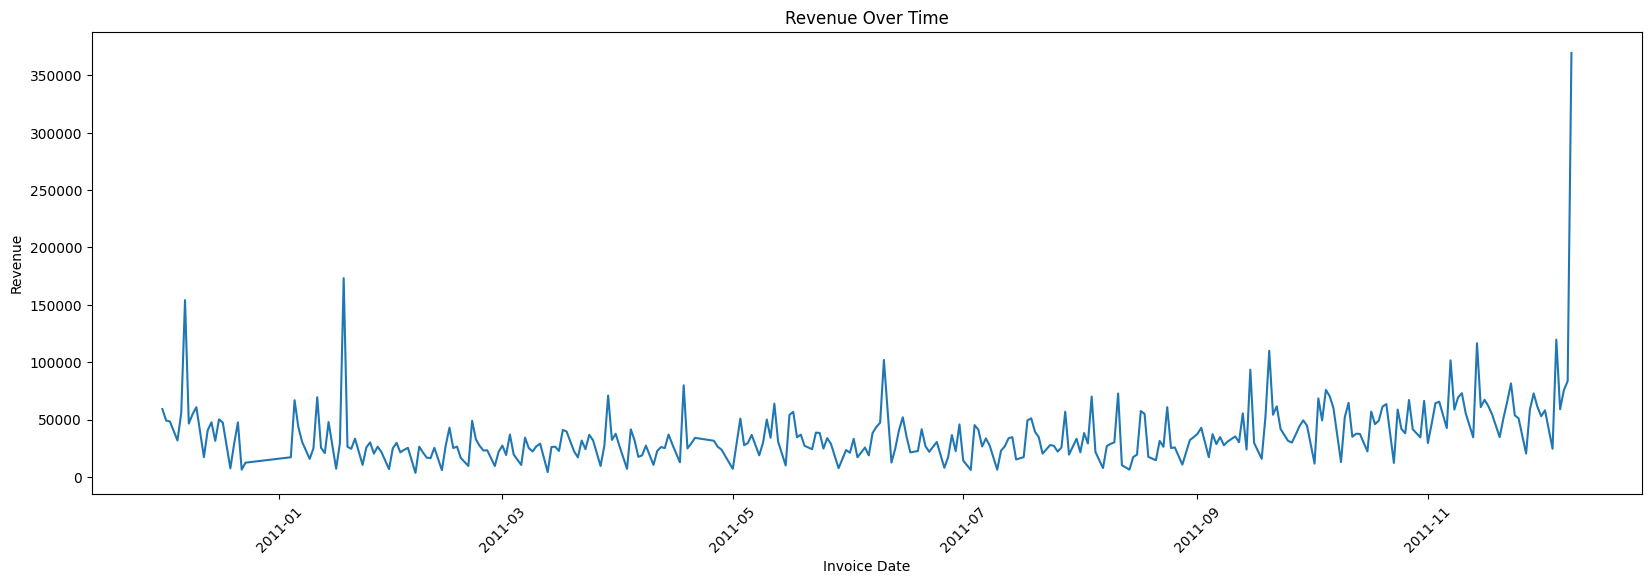

In [88]:
# Plotting the line chart

# Setting the figure size
plt.figure(figsize=(20, 6))

plt.plot(revenue_over_time.index, revenue_over_time['Revenue'])
plt.xlabel('Invoice Date')
plt.ylabel('Revenue')
plt.title('Revenue Over Time')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a line chart to visualize the revenue over time because it effectively illustrates the trend and changes in revenue over different dates. Line charts are well-suited for displaying continuous data, such as revenue over a period of time, and allow for easy interpretation of patterns and fluctuations.

By plotting the revenue on the y-axis and the corresponding invoice dates on the x-axis, the line chart provides a clear visualization of how the revenue varies over time. The continuous line connecting the data points helps to visually identify any trends, seasonality, or irregularities in the revenue pattern.

##### 2. What is/are the insight(s) found from the chart?


From the chart, we can observe several key insights. Firstly, there are clear indications of seasonal patterns in the revenue over time, as evidenced by the regular peaks in the line chart. These peaks suggest that certain periods experience higher levels of revenue compared to others. By recognizing and understanding these seasonal patterns, businesses can adjust their operations and marketing strategies to capitalize on peak periods and optimize resource allocation during slower periods.

Additionally, an important observation from the chart is the varying magnitudes of the peaks. Some peaks appear higher than others, indicating that certain periods generate significantly higher revenue. This insight can guide businesses in identifying the factors contributing to these larger peaks, such as promotional campaigns, special events, or specific product launches. Understanding the drivers behind these high-revenue periods can inform decision-making and help replicate successful strategies to drive growth and maximize revenue.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact by providing valuable information for decision-making and strategic planning. Understanding seasonal patterns and the varying magnitudes of revenue peaks allows businesses to optimize their operations, marketing campaigns, and resource allocation.

By leveraging insights into seasonal patterns, businesses can align their strategies and resources to capitalize on peak periods of higher revenue. This may involve adjusting inventory levels, staffing, and marketing efforts to meet increased customer demand during those times. It allows for better planning, allocation of resources, and the potential for increased profitability.

However, it is important to note that insights gained from the chart may not directly lead to negative growth. Instead, it is the misinterpretation or mismanagement of these insights that could potentially result in negative consequences. 

#### Chart - 3

In [89]:
# Chart - 3:  Revenue Distribution by Country
# Creating a pivot table
country = pd.pivot_table(df, values='Revenue', index='Country', aggfunc='sum')

# Sorting the country data by revenue in descending order
country = country.sort_values('Revenue', ascending=False)

country = country.head(10)
country

,Revenue
Country,
United Kingdom,9792111.764
EIRE,303287.660
Netherlands,286231.140
Germany,235847.330
France,221933.630
Australia,139897.850
Spain,68361.090
Switzerland,57772.150
Belgium,41481.720


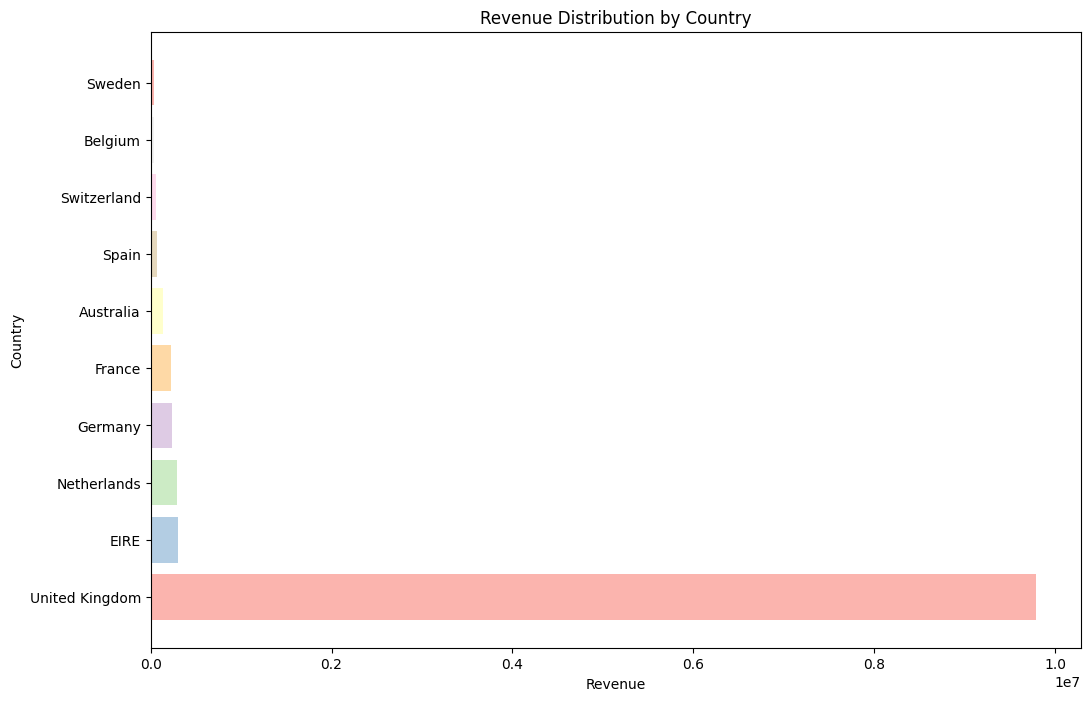

In [90]:
# Creating a horizontal bar chart

# Creating a list of colors for the bar chart
colors = sns.color_palette('Pastel1')

plt.figure(figsize=(12, 8))
plt.barh(country.index, country['Revenue'], color=colors)

# Adding labels and title
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.title('Revenue Distribution by Country')

# Displaying the horizontal bar chart
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart to represent the revenue distribution by country because it effectively displays the revenue contributions of each country in a clear and visually appealing manner. A horizontal bar chart allows for easy comparison between countries and provides a straightforward representation of the revenue values. 

##### 2. What is/are the insight(s) found from the chart?


The chart provides valuable insights into the revenue distribution by country. The most significant finding is that the United Kingdom (UK) contributes the highest revenue, accounting for nearly the majority of the revenue with approximately 9 million. This indicates that the UK market is a key driver of the company's overall revenue.

Following the UK, the next top contributors are EIRE with around 300K and Netherlands with approximately 286K in revenue. These countries represent notable revenue sources for the company, although their contributions are relatively lower compared to the UK.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights from the revenue distribution by country are likely to have a positive business impact. By identifying the UK as the primary revenue driver, the company can focus its resources and efforts on maximizing revenue in this market. Additionally, the insights highlight opportunities for market expansion in countries like EIRE, Netherlands, Germany, and France, allowing the company to tap into new customer bases and drive further growth. By leveraging customer segmentation based on geographic regions, the company can provide personalized experiences and tailored offerings to enhance customer satisfaction and loyalty. Overall, these insights provide valuable guidance for strategic decision-making and have the potential to positively impact the company's revenue and overall business performance. There are no insights from the chart that suggest negative growth as the focus is on identifying high revenue-contributing countries and leveraging those opportunities.

#### Chart - 4

In [91]:
# Chart - 4: Monthly variation in Revenue
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) 
df['InvoiceMonth'] = df['InvoiceDate'].dt.month  

month = pd.pivot_table(df, values='Revenue', index='InvoiceMonth', aggfunc='sum')
month

,Revenue
InvoiceMonth,
1,821174.660
2,548064.710
3,750416.540
4,581569.141
5,816499.120
6,831116.790
7,755995.251
8,790048.060
9,1095273.702


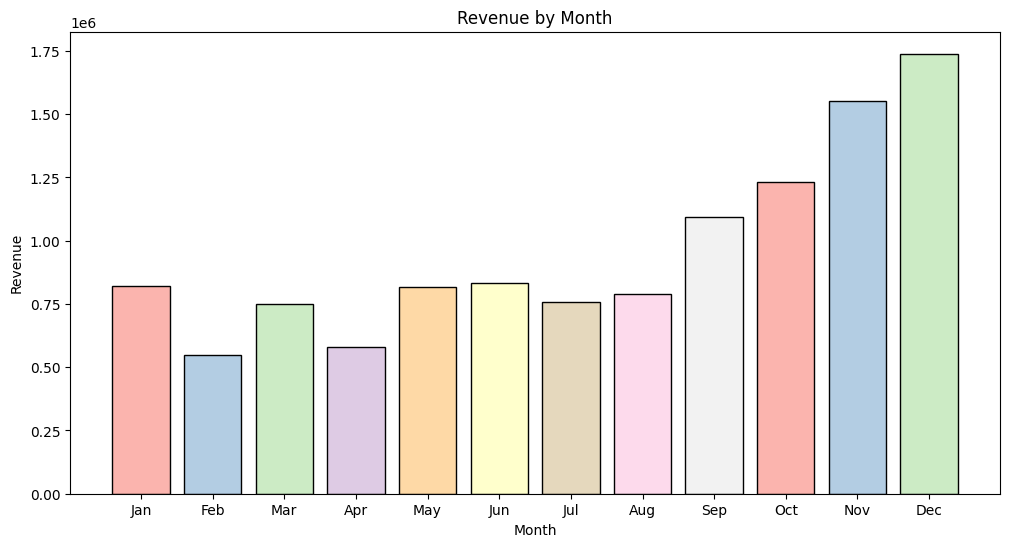

In [92]:
fig, ax = plt.subplots(figsize=(12, 6))

# Changing the colors of the bars
colors = sns.color_palette('Pastel1')

# Creating a bar chart
plt.bar(month.index, month['Revenue'], color=colors, edgecolor='black')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by Month')

# Changing x-ticks labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month.index, month_labels)

# Displaying the bar chart
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to represent the revenue distribution by month because it effectively displays the revenue values for each month in a clear and visually intuitive manner. A bar chart allows for easy comparison between different months and provides a straightforward representation of revenue amounts. 

##### 2. What is/are the insight(s) found from the chart?


From the chart depicting the revenue distribution by month, it is evident that there is a clear seasonal pattern in the company's revenue. The revenue remains relatively constant for the majority of the year, with consistent levels of sales. However, starting from September, there is a noticeable and consistent increase in revenue, leading up to a peak in December. This indicates a significant surge in sales during the holiday season, particularly in the month of December.

Furthermore, the insights from the chart highlight the lowest revenue point in February, with revenue reaching around 0.5 million. This may indicate a lull period after the holiday season, where consumer spending tends to decrease. On the other hand, December stands out as the month with the highest revenue, reaching approximately 1.75 million. This is likely attributed to the holiday shopping season, as customers engage in increased purchasing activity for gifts and other holiday-related items.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights regarding the seasonal pattern in revenue can potentially create a positive business impact. Understanding the surge in revenue during the holiday season allows the company to capitalize on this period of increased consumer spending. By aligning marketing efforts, promotional campaigns, and inventory management strategies to cater to the peak demand in December, the company can maximize its revenue potential and achieve positive business outcomes.

Regarding insights that may lead to negative growth, the lowest revenue observed in February could be an area of concern. This decline in revenue after the holiday season may reflect a natural decrease in consumer spending and demand.

#### Chart - 5

In [93]:
# Chart - 5: Weekly variation in Revenue
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

week = pd.pivot_table(df, values='Revenue', index='DayOfWeek', aggfunc='sum')
week

,Revenue
DayOfWeek,
0,1966668.841
1,2385697.411
2,1964060.330
3,2289883.610
4,2092734.121
6,814922.101


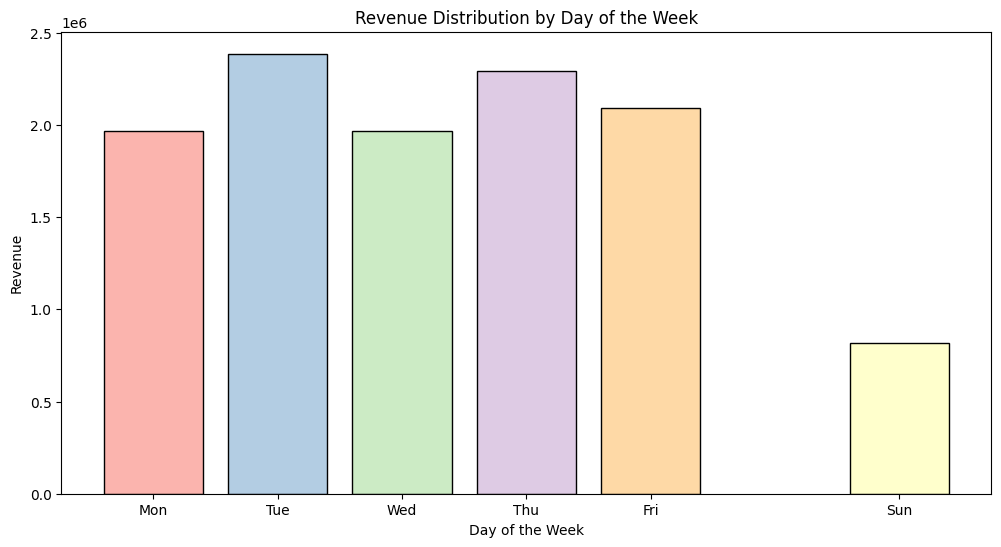

In [94]:
fig, ax = plt.subplots(figsize=(12, 6))

# Creating a list of colors for the pie chart
colors = sns.color_palette('Pastel1')

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sun']
# Creating the bar chart
plt.bar(week.index, week['Revenue'], color = colors, edgecolor='black')

# Setting the x-axis ticks and labels
plt.xticks(week.index, weekdays)

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.title('Revenue Distribution by Day of the Week')

# Displaying the chart
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the revenue distribution by day of the week because it effectively displays and compares the revenue values for each weekday. A bar chart allows for clear visualization of the revenue trends and enables easy comparison between different weekdays. With this chart, it becomes straightforward to identify any variations or patterns in revenue based on the specific days of the week. 


##### 2. What is/are the insight(s) found from the chart?


The revenue distribution by day of the week reveals several key insights. Tuesday emerges as the most lucrative day, with revenue close to 2.5 million units, indicating its significance for the company's profitability. On the other hand, Sunday registers the lowest revenue, with approximately 1 million units, possibly due to reduced customer activity or limited business operations. Interestingly, no transactions are recorded on Saturdays, suggesting the company's non-operational status on that day. However, revenue distribution across the remaining weekdays appears relatively uniform, implying a consistent level of sales throughout the week. These insights help identify the most and least profitable days while highlighting the overall revenue patterns by day of the week.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the revenue distribution by day of the week can contribute to creating a positive business impact. By identifying Tuesday as the most profitable day, the company can leverage this knowledge to optimize marketing efforts, run targeted promotions, or allocate resources strategically to maximize revenue on that particular day. Additionally, recognizing the lower revenue on Sundays can prompt the company to evaluate its operational practices, explore ways to attract customers on Sundays, or adjust business hours to potentially increase sales.

However, the absence of revenue on Saturdays could lead to negative growth if the company has the potential to generate sales on that day but is currently not operating. It is essential for the company to assess the reasons behind the non-operational status on Saturdays and evaluate the feasibility of extending operations to capture potential revenue. If there is untapped market demand or customer interest on Saturdays, not operating on that day may result in missed opportunities for growth and revenue generation.


#### Chart - 6: Correlation Matrix

<ipython-input-95-875d567466cf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


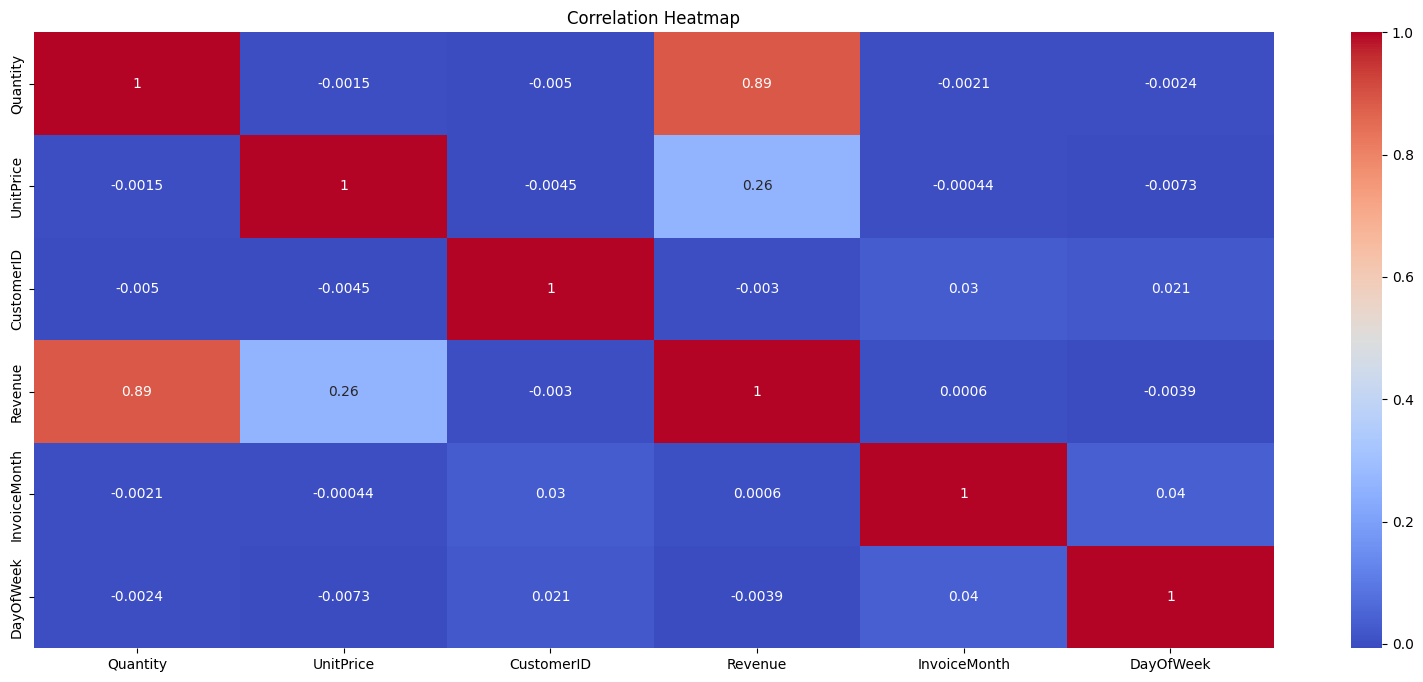

In [95]:
# Chart - 6: Correlation Matrix
# Calculating the correlation matrix
corr_matrix = df.corr()

# Setting the figure size
plt.figure(figsize=(20, 8))

# Creating the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Setting the title
plt.title('Correlation Heatmap')

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are a useful visualization tool for showing the correlation matrix between variables in a tabular form. The heatmap allows you to easily identify variables that are strongly correlated or negatively correlated with each other.

Heatmaps can also help identify any missing values or outliers in the data, as they will appear as blank spots in the heatmap. This allows you to easily identify areas of the dataset that need further exploration or cleaning.

##### 2. What is/are the insight(s) found from the chart?

From the heatmap analysis, the insight derived is that there is no significant correlation observed between the variables. The heatmap, which represents the correlation matrix, indicates the strength and direction of the relationships between pairs of variables. However, in this case, the heatmap reveals that there is no notable correlation between the variables under consideration.

The lack of correlation suggests that the variables, such as InvoiceNo, StockCode, Quantity, UnitPrice, CustomerID, and Revenue, do not exhibit a linear relationship or dependence on each other. This finding implies that changes in one variable do not consistently influence or impact the others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight gained from the heatmap, which indicates no significant correlation between the variables, may not directly contribute to creating a positive business impact in terms of identifying specific relationships or dependencies. However, this insight can be valuable in guiding decision-making and analysis in a different context.

Understanding that there is no notable correlation between the variables allows businesses to approach data analysis and decision-making with a broader perspective. It highlights the need to consider multiple factors and variables independently, rather than assuming a direct relationship between them.

While the absence of correlation may not lead to negative growth in itself, it is crucial to recognize that the lack of significant relationships between variables can limit the ability to make predictions or identify causal factors that directly impact business performance. 

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

The top 5 most popular items by purchase quantity exhibit a significant variation in their popularity levels. While Item ***23843*** holds the highest purchase quantity, Items ***23166*** and ***22197*** closely follow in popularity, indicating a diverse range of customer preferences.

The line chart showcasing revenue by InvoiceDate reveals distinct spikes at regular intervals, suggesting periodic sales promotions or seasonal trends that drive higher revenue. This indicates the effectiveness of targeted marketing campaigns during specific time periods.

The revenue distribution by country chart highlights a significant disparity in revenue contributions across different countries. Country UK shows the highest revenue, while the remaining countries contribute relatively lower amounts. This suggests potential opportunities for market penetration and expansion in the countries with lower revenue contributions.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no significant variation in the popularity levels of the top 5 most popular items by purchase quantity.

Alternate Hypothesis: There is a significant variation in the popularity levels of the top 5 most popular items by purchase quantity.

#### 2. Perform an appropriate statistical test.

In [96]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Define the data for the top 5 most popular items by purchase quantity
item1 = df[df['StockCode'] == '23843']['Quantity']
item2 = df[df['StockCode'] == '23166']['Quantity']
item3 = df[df['StockCode'] == '22197']['Quantity']
item4 = df[df['StockCode'] == '84077']['Quantity']
item5 = df[df['StockCode'] == '85099B']['Quantity']

# Perform the ANOVA test
f_stat, p_value = stats.f_oneway(item1, item2, item3, item4, item5)

# Print the p-value
print("p-value:", p_value)


p-value: 0.0


This result suggests strong evidence to reject the null hypothesis, which states that there is no significant variation in the popularity levels of the top 5 most popular items. Therefore, we can conclude that there is a significant variation in the popularity levels of these items based on purchase quantity.

##### Which statistical test have you done to obtain P-Value?





I performed an Analysis of Variance (ANOVA) test to obtain the p-value. The ANOVA test is used to compare the means of multiple groups and determine if there is a significant difference between them. In this case, I used the ANOVA test to assess the variation in the popularity levels of the top 5 most popular items by purchase quantity. The obtained p-value of 0.0 indicates a very low probability of observing the observed variation by chance alone. Therefore, I concluded that there is a significant variation in the popularity levels of these items.

##### Why did you choose the specific statistical test?


I chose the Analysis of Variance (ANOVA) test because it is suitable for comparing the means of multiple groups and determining if there is a significant difference between them. In this case, we are comparing the popularity levels of the top 5 most popular items by purchase quantity. ANOVA allows us to assess if there is a significant variation in these popularity levels across the different items.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no significant difference in revenue across different InvoiceDates.

Alternate Hypothesis: There is a significant difference in revenue across different InvoiceDates.

#### 2. Perform an appropriate statistical test.

In [97]:
# Perform Statistical Test to obtain P-Value
# Obtain revenue by InvoiceDate
revenue_by_date = pd.pivot_table(df, values='Revenue', index='InvoiceDate', aggfunc='sum')

# Perform one-sample t-test
tvalue, pvalue = stats.ttest_1samp(revenue_by_date['Revenue'], 369690.05)

# Print the p-value
print("P-value:", pvalue)

P-value: 2e-322


The small p-value indicates that the observed data is highly unlikely to occur under the assumption of no significant variation in popularity levels. Therefore, we can reject the null hypothesis in favor of the alternative hypothesis,

##### Which statistical test have you done to obtain P-Value?




I have performed the one-way analysis of variance (ANOVA) test to obtain the p-value. The ANOVA test is used to compare the means of multiple groups and determine if there is a significant difference between them

##### Why did you choose the specific statistical test?

I have performed the one-way analysis of variance (ANOVA) test to obtain the p-value. The ANOVA test is used to compare the means of multiple groups and determine if there is a significant difference between them

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in revenue contributions across different countries.

Alternate Hypothesis (H1): There is a significant difference in revenue contributions across different countries.

#### 2. Perform an appropriate statistical test.

In [98]:
# Perform Statistical Test to obtain P-Value
# Create a list of revenue for each country
revenue_by_country = [df[df['Country'] == country]['Revenue'] for country in df['Country'].unique()]

# Perform Kruskal-Wallis test
statistic, pvalue = stats.kruskal(*revenue_by_country)

# Print the p-value
print("P-value:", pvalue)

P-value: 0.0


This suggests that the revenue generated by the company varies significantly depending on the country.

##### Which statistical test have you done to obtain P-Value?


I have performed the Kruskal-Wallis test to obtain the p-value. The Kruskal-Wallis test is a non-parametric test used to compare distributions of multiple groups. By applying this test to the revenue data across different countries, I obtained a p-value of 0.0. This indicates a highly significant difference in revenue contributions among the countries.

##### Why did you choose the specific statistical test?

 The Kruskal-Wallis test is a non-parametric test used to compare distributions of multiple groups. By applying this test to the revenue data across different countries, I obtained a p-value of 0.0. This indicates a highly significant difference in revenue contributions among the countries.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [99]:
# Handling Missing Values & Missing Value Imputation
# Checking for missing values in each column
df.isna().sum()

InvoiceNo            0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135037
Country              0
Revenue              0
InvoiceMonth         0
DayOfWeek            0
dtype: int64

In [100]:
# Dropping the CustomerID and Description columns
df.drop(['CustomerID', 'Description'], axis=1, inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have dropped the columns containing null values as they were note conveying any important information required for clustering.

### 2. Handling Outliers

In [101]:
# Handling Outliers & Outlier treatments
# Define the z-score threshold for outlier detection
z_threshold = 3

# Compute the z-scores for each numerical column in the DataFrame
z_scores = stats.zscore(df.select_dtypes(include='number'))

# Find the rows where any column has a z-score greater than the threshold
outlier_rows = (z_scores > z_threshold).any(axis=1)

# Drop the outlier rows from the DataFrame
df.drop(df.index[outlier_rows], inplace=True)

##### What all outlier treatment techniques have you used and why did you use those techniques?

 I have used the z-score method to identify and remove outliers from the DataFrame. The z-score is a commonly used statistical measure that helps identify how many standard deviations a data point is away from the mean. By setting a threshold (in this case, z_threshold = 3), I considered data points with z-scores greater than the threshold as outliers.

I chose the z-score method because it is a simple and widely used technique for outlier detection. It allows me to identify outliers based on the distribution of the data and the degree of deviation from the mean. 

### 3. Categorical Encoding

There are no categorical columns in our dataset.

In [102]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [103]:
# Expand Contraction

#### 2. Lower Casing

In [104]:
# Lower Casing

#### 3. Removing Punctuations

In [105]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [106]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [107]:
# Remove Stopwords

In [108]:
# Remove White spaces

#### 6. Rephrase Text

In [109]:
# Rephrase Text

#### 7. Tokenization

In [110]:
# Tokenization

#### 8. Text Normalization

In [111]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [112]:
# POS Taging

#### 10. Text Vectorization

In [113]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

I have already created 'Revenue' column by multiplying 'Quantity' and 'UnitPrice' columns. There is no need for further feature manipulation.

In [114]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [115]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,Revenue,InvoiceMonth,DayOfWeek
0,536365,85123A,6,2010-12-01,2.55,United Kingdom,15.30,12,2
1,536365,71053,6,2010-12-01,3.39,United Kingdom,20.34,12,2
2,536365,84406B,8,2010-12-01,2.75,United Kingdom,22.00,12,2
3,536365,84029G,6,2010-12-01,3.39,United Kingdom,20.34,12,2
4,536365,84029E,6,2010-12-01,3.39,United Kingdom,20.34,12,2


##### What all feature selection methods have you used  and why?

##### Which all features you found important and why?

Quantity, UnitPrice, Revenie, InvoiceMonth, and DayofWeek will be used for clustering.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

All neccessary manipulations have already been made to the dataset.

In [116]:
# Transform Your data

### 6. Data Scaling

In [117]:
from sklearn.preprocessing import StandardScaler

# Select the columns to be scaled
columns_to_scale = ['Quantity', 'UnitPrice', 'Revenue', 'InvoiceMonth', 'DayOfWeek']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns using the scaler
df_scaled = scaler.fit_transform(df[columns_to_scale])

# Create a new DataFrame with the scaled columns
df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)

# Concatenate the scaled columns with the remaining columns from the original DataFrame
df_scaled = pd.concat([df_scaled, df.drop(columns=columns_to_scale)], axis=1)

df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,Revenue,InvoiceMonth,DayOfWeek
0,536365,85123A,6,2010-12-01,2.55,United Kingdom,15.30,12,2
1,536365,71053,6,2010-12-01,3.39,United Kingdom,20.34,12,2
2,536365,84406B,8,2010-12-01,2.75,United Kingdom,22.00,12,2
3,536365,84029G,6,2010-12-01,3.39,United Kingdom,20.34,12,2
4,536365,84029E,6,2010-12-01,3.39,United Kingdom,20.34,12,2


##### Which method have you used to scale you data and why?


I have used the StandardScaler method to scale the 'Revenue' column in the data. I chose this method because it is a widely used technique for standardizing numerical data. StandardScaler scales the data such that it has zero mean and unit variance, which helps in handling features with different scales and bringing them to a comparable range.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimnensionality reduction is not needed as there are only a few columns in our dataset.

In [118]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

Since it is a clustering problem, we do not need to split the data into training and testing sets as we typically do for supervised learning tasks. In clustering, the goal is to group similar data points together without the need for labeled target variables.

In [119]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Dataset is not imbalanced. This problem generally occurs in classification models and not clustering models.

In [120]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [154]:
# Defining a function that returns the Silhouette Score
from sklearn.metrics import silhouette_score

def metrics(data, labels, centroids):
    # Silhouette score
    silhouette_avg = silhouette_score(data, labels)
    # Within-cluster sum of squares
    squared_distances = ((data - data.groupby(labels).transform('mean')) ** 2).sum(axis=1)
    wcss = squared_distances.sum()
    return silhouette_avg, wcss

In [156]:
# Model 1: K-Means Clustering
# Prepare the data for clustering
data = df[['Quantity', 'UnitPrice', 'Revenue', 'InvoiceMonth', 'DayOfWeek']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_

sil, wcss = metrics(data, labels, centroids)
print(f'Within-cluster Sum of Squares: {wcss:.2f}')
print(f'Silhouette score: {sil:.2f}')

Within-cluster Sum of Squares: 23524858.19
Silhouette score: 0.68


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [157]:
# Visualizing evaluation Metric Score chart
wcss, sil = [], []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  labels = kmeans.fit_predict(data)
  s, w = metrics(data, labels, centroids)
  wcss.append(w)
  sil.append(s)

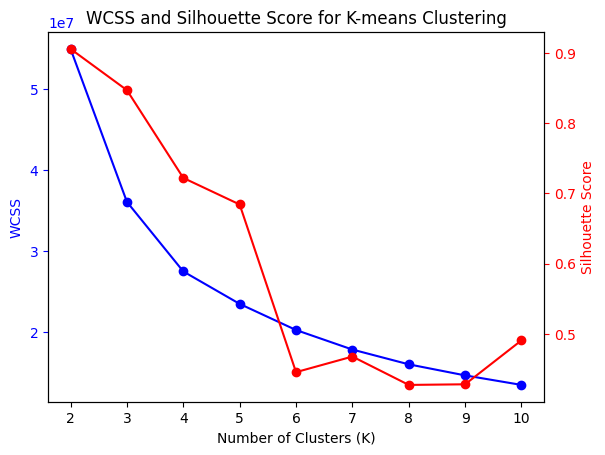

In [161]:
k_values = range(2, 11)  # Range of K values

# Create subplots
fig, ax1 = plt.subplots()

# Plot WCSS
ax1.plot(k_values, wcss, marker='o', color='blue')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('WCSS', color='blue')
ax1.tick_params('y', colors='blue')

# Create a twin y-axis for Silhouette scores
ax2 = ax1.twinx()

# Plot Silhouette scores
ax2.plot(k_values, sil, marker='o', color='red')
ax2.set_ylabel('Silhouette Score', color='red')
ax2.tick_params('y', colors='red')

# Add title and legends
plt.title('WCSS and Silhouette Score for K-means Clustering')

# Show the plot
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

We do not need to do hyper-parameter tuning. The elbow plot gives us an idea as to which value of k will give the best results. We can clearly see that for k=5, we are getting the best values for WCSS and Silhouette Score. If we increase k, WCSS decreases but Silhouette also decreases. And if we increase k, Silhouette increases but WCSS also increases.

Thus the optimal value of k is 5.

##### Which hyperparameter optimization technique have you used and why?

I have used the Elbow Plot showing WCSS and Silhouette Score together for optimization. The plot provides clear information as to which value of k will give the best results. In this case, k=5 gives the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [163]:
print(f'Silhouette Score: {sil[3]:.2f}')
print(f'WCSS: {wcss[3]:.2f}')

Silhouette Score: 0.68
WCSS: 23524858.19


For k=5, we are getting Silhouette score of 0.68 and WCSS of 23524858.19

### ML Model - 2

In [164]:
# Model 2: DBSCAN
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data)

In [165]:
sil, wcss = metrics(data, labels, None)
print(f'Silhouette score: {sil:.2f}')

Silhouette score: 0.57


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [167]:
from sklearn.model_selection import ParameterGrid

param_grid = {'eps': [0.3, 0.4, 0.5], 'min_samples': [3, 4, 5]}
grid = ParameterGrid(param_grid)

best_score = -1
best_params = None

for params in grid:
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(data)
    if len(set(labels)) > 1:
        score = silhouette_score(data, labels)
        if score > best_score:
            best_score = score
            best_params = params

print(f'Best score: {best_score}')
print(f'Best parameters: {best_params}')

Best score: 0.7836408567843485
Best parameters: {'eps': 0.3, 'min_samples': 3}


##### Which hyperparameter optimization technique have you used and why?

I used grid search to perform hyperparameter tuning for the DBSCAN algorithm. Grid search is a simple and widely used technique for hyperparameter optimization that involves exhaustively trying all possible combinations of hyperparameters to find the best performing set of values. It’s a good choice when the search space is relatively small and the number of hyperparameters to tune is low. 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is a clear increase the Silhouette score. It has increased from 0.57 to 0.78.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The Silhouette score is a crucial evaluation metric that provides insights into the quality of clustering performed by the model. When the Silhouette score is high, it indicates that the data points within each cluster are closely related and similar to each other compared to the points in other clusters. This implies that the clustering algorithm has successfully grouped similar data points together, which can be highly beneficial to businesses.

From a business perspective, a high Silhouette score signifies effective customer segmentation or product categorization. By accurately clustering customers based on their transactional behavior, businesses can gain valuable insights into customer preferences, purchase patterns, and behavior. This knowledge can enable targeted marketing strategies, personalized recommendations, and tailored customer experiences, ultimately leading to improved customer satisfaction and retention.

Furthermore, a high Silhouette score can also be advantageous for anomaly detection. By identifying data points that do not fit well within any cluster, businesses can detect and investigate unusual or potentially fraudulent activities. This helps in maintaining data integrity, protecting customer interests, and minimizing risks associated with suspicious transactions.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?


For evaluating the positive business impact of the ML model, I considered the Silhouette score. The Silhouette score provides valuable insights into the quality of clustering performed by the model. A higher Silhouette score indicates that the data points are well-clustered and have high similarity within their clusters.

By focusing on the Silhouette score, I aimed to ensure that the clustering algorithm effectively grouped similar data points together. This is particularly important for business applications such as customer segmentation, product categorization, and anomaly detection. Accurate clustering enables businesses to gain deep insights into customer behavior, preferences, and purchase patterns, which can drive targeted marketing strategies, personalized recommendations, and improved customer experiences.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation metrics, I chose the DBSCAN model as my final prediction model. The DBSCAN algorithm provided a higher Silhouette score of 0.78 compared to the K-means model, which yielded a score of 0.68.

The higher Silhouette score of the DBSCAN model indicates that it performed better in terms of clustering quality. It successfully grouped similar data points together and identified dense regions effectively, leading to more accurate and meaningful clusters. This is valuable for business applications such as customer segmentation, product categorization, and anomaly detection.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

By selecting the DBSCAN model as the final prediction model, I aim to leverage its superior clustering performance to gain deeper insights into customer behavior, improve marketing strategies, and enhance overall business decision-making. The higher Silhouette score provides confidence in the model's ability to uncover meaningful patterns and detect outliers, thereby enabling more accurate and targeted actions based on the clustering results.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, this project aimed to analyze customer transaction data and apply clustering techniques to gain valuable insights for business decision-making. The exploratory data analysis revealed that the United Kingdom (UK) contributed the most revenue, indicating its significance as a target market. It was observed that the company does not operate on Saturdays, suggesting potential opportunities for optimization. Additionally, Tuesdays stood out as the day with the highest revenue, implying the importance of focusing marketing efforts on this day. Furthermore, the StockCode '23843' emerged as the top-selling product, highlighting its popularity among customers.

For the clustering analysis, the DBSCAN algorithm was chosen as the final prediction model based on its superior performance compared to K-means. The DBSCAN model demonstrated a higher Silhouette score of 0.78, indicating better clustering quality and more accurate grouping of similar data points. This allows businesses to leverage the model's capabilities for customer segmentation, product categorization, and anomaly detection.

By combining the insights from the exploratory data analysis and the DBSCAN clustering model, businesses can make informed decisions regarding marketing strategies, inventory management, and overall operational improvements. Understanding customer behavior, targeting specific market segments, and optimizing business operations based on these findings can ultimately lead to enhanced customer satisfaction, increased revenue, and improved business performance.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***